In [ ]:
'''
DESCRIPTION:==========================================================================================================

Identify the level of income qualification needed for the families in Latin America.

Problem Statement Scenario:
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on 
the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove
that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. 
With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls 
and ceiling or the assets found in their homes to classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of 
Costa Rican household characteristics, might help improve PMT’s performance.

Following actions should be performed:

Identify the output variable.
Understand the type of data.
Check if there are any biases in your dataset.
Check whether all members of the house have the same poverty level.
Check if there is a house without a family head.
Set poverty level of the members and the head of the house within a family.
Count how many null values are existing in columns.
Remove null value rows of the target variable.
Predict the accuracy using random forest classifier.
Check the accuracy using random forest with cross validation.
'''

In [2]:
#importing income qualification dataset
import pandas as pd
income_train_df=pd.read_csv("E:/Education/PGP Simplilearn-Purdue/PGP in Data Science/Machine Learning/Machine-Learning--Projects-master/Projects/Projects for Submission/Project 2 - Income Qualification/Dataset for the project/train.csv")
income_test_df=pd.read_csv("E:/Education/PGP Simplilearn-Purdue/PGP in Data Science/Machine Learning/Machine-Learning--Projects-master/Projects/Projects for Submission/Project 2 - Income Qualification/Dataset for the project/test.csv")

In [3]:
#Exploring the datasets
income_train_df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [4]:
income_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [5]:
income_test_df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.2500,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.2500,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.2500,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.0000,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,ID_a065a7cad,NaN,1,2,1,1,1,0,NaN,0,...,10,9,100,36,25,4,36.00,0.25,33.0625,100
23852,ID_1a7c6953b,NaN,0,3,0,1,1,0,NaN,0,...,54,36,2916,16,36,4,4.00,1.00,36.0000,2916
23853,ID_07dbb4be2,NaN,0,3,0,1,1,0,NaN,0,...,12,16,144,16,36,4,4.00,1.00,36.0000,144
23854,ID_34d2ed046,NaN,0,3,0,1,1,0,NaN,0,...,12,25,144,16,36,4,4.00,1.00,36.0000,144


In [6]:
income_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [7]:
#Analysis Tasks
#Identify the output variable.
income_train_df['Target'].value_counts()
#Observations:
#Output variable is 'Target'
#Target is an ordinal variable with 4 levels(1,2,3,4) indicating different levels of poverty as mentioned below
#1 = extreme poverty
#2 = moderate poverty
#3 = vulnerable households
#4 = non vulnerable households

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [8]:
#Understand the type of data.
income_train_df.info()
#Observations:
#Training data has 142 feature variables of which 129 are integer type,8 are float and 5 are of string type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [9]:
#Check if there are any biases in your dataset.
income_train_df['Target'].value_counts()
#Observations:
#Target variable has 5996(~62.57%) non vulnerable cases out of 9557 data points
#Dataset is biased towards non vulnerable cases

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

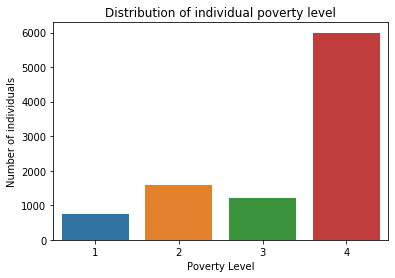

In [10]:
#Target variable visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(income_train_df['Target'])
plt.title('Distribution of individual poverty level')
plt.xlabel('Poverty Level')
plt.ylabel('Number of individuals')
plt.show()
#Observation:
#It can be clearly seen from the visualization that the dataset is biased towards non vulnerable house holds

In [11]:
#Check whether all members of the house have the same poverty level.
households_df=income_train_df['idhogar'].value_counts()
print(households_df)
print(households_df[households_df>1])
#Observations:
#There are a total of 2988 households and the largest household has a total of 13 people
#There are 2590 households which has atleast 2 people=> rest(398) are single person households

fd8a6d014    13
ae6cf0558    12
0c7436de6    12
b7a0b59d7    11
3fe29a56b    11
             ..
dd378a85b     1
7c014f3e7     1
cd661cbbb     1
1637ac45b     1
27a4747da     1
Name: idhogar, Length: 2988, dtype: int64
fd8a6d014    13
ae6cf0558    12
0c7436de6    12
b7a0b59d7    11
3fe29a56b    11
             ..
9755fce52     2
58669d6f5     2
390dafa00     2
624283607     2
479be5ccb     2
Name: idhogar, Length: 2590, dtype: int64


In [12]:
#Check whether all members of the house have the same poverty level.
def is_unique(h):
    t=h.to_numpy()
    return (t[0]==t).all()

h_list=[]
for c in households_df[households_df>1].index:
    if(is_unique(income_train_df[income_train_df['idhogar']==c]['Target'])==False):
        h_list.append(c)

len(h_list)
#Observations:
#All the members of the household does not have the same poverty level for 85 households 

85

In [13]:
#Check if there is a house without a family head.
#Households with a family head
print("Households with family head:",len(income_train_df.idhogar[income_train_df['parentesco1']==1].unique()))

#Households without family head
x=[x for x in list(households_df.index) if x not in list(income_train_df.idhogar[income_train_df['parentesco1']==1])]
print("Households without family head:",len(x))
print(x)
#Observation:
#There are 15 households without a family head

Households with family head: 2973
Households without family head: 15
['6b1b2405f', 'f2bfa75c4', 'c0c8a5013', '03c6bdf85', 'bfd5067c2', '1bc617b23', 'ad687ad89', '61c10e099', '896fe6d3e', '374ca5a19', '1367ab31d', 'd363d9183', '09b195e7a', 'a0812ef17', 'b1f4d89d7']


In [14]:
#Check whether all members of the house does not have the same poverty level and without family head
y=[x for x in x if x in h_list]
len(y)
#Observation:
#There are 0 households where all members of the house does not have the same poverty level and without family head

0

In [15]:
#Set poverty level of the members and the head of the house within a family.
#Setting the poverty level of members same as head of the family
for h in h_list:
    income_train_df.loc[income_train_df['idhogar']==h,'Target']=int(income_train_df.Target[(income_train_df['idhogar']==h) & (income_train_df['parentesco1']==1)])

In [16]:
#Check whether all members of the house have the same poverty level.
h_list1=[]
for c in households_df[households_df>1].index:
    if(is_unique(income_train_df[income_train_df['idhogar']==c]['Target'])==False):
        h_list1.append(c)

len(h_list1)
#Observations:
#All the members of the household does not have the same poverty level has been set

0

In [17]:
#Count how many null values are existing in columns.
income_train_df.isna().sum()[income_train_df.isna().sum()>0]
#Observations:
#There are 5 columns with null values
#3(Monthly rent Payment, number of tablets household owns and Years behind in school) columns have high proportion of nulls
#2 columns(average years of education for adults (18+) and square of the mean years of education of adults (>=18) in the household)-
#have negligible null values

#Inferences:
#Monthly rent payment could be null as the household might own a house and don't have to pay rent
#Number of tablets owned by a household could be null as they don't own any tablets
#Years behing in school could be null as these individuals were never behind in school
#Average years of education could be null as they might be uneducated
#These values can be imputed by '0'

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [18]:
#Imputing null values with 0's for first 3 columns and deleting null records for last 2 columns
income_train_df['v2a1'].fillna(value=0,inplace=True)
income_train_df['v18q1'].fillna(value=0,inplace=True)
income_train_df['rez_esc'].fillna(value=0,inplace=True)
income_train_df['meaneduc'].fillna(value=0,inplace=True)
income_train_df['SQBmeaned'].fillna(value=0,inplace=True)

In [19]:
#Count how many null values are existing in columns after imputing
income_train_df.isna().sum()[income_train_df.isna().sum()>0]

Series([], dtype: int64)

In [20]:
#Same exercise should be repeated for test dataset
income_test_df.isna().sum()[income_test_df.isna().sum()>0]

v2a1         17403
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

In [21]:
#Imputing null values with 0's for first 3 columns and deleting null records for last 2 columns
income_test_df['v2a1'].fillna(value=0,inplace=True)
income_test_df['v18q1'].fillna(value=0,inplace=True)
income_test_df['rez_esc'].fillna(value=0,inplace=True)
income_test_df['meaneduc'].fillna(value=0,inplace=True)
income_test_df['SQBmeaned'].fillna(value=0,inplace=True)

In [22]:
#Count how many null values are existing in columns after imputation
income_test_df.isna().sum()[income_test_df.isna().sum()>0]

Series([], dtype: int64)

In [23]:
#Remove null value rows of the target variable.
income_train_df['Target'].isna().sum()
#No null values are present in target column

0

In [24]:
#Checking for columns with string data type
income_train_df.columns[income_train_df.dtypes=='object']
#Observations:
#ID and Idhogar represents individuals and households
#Rest of the columns should be numeric and will be replaced by 1 for yes and 0 for no as per the data dictionary

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [25]:
#Replacing strings with numeric values
income_train_df.loc[income_train_df['dependency']=='yes','dependency']=1
income_train_df.loc[income_train_df['dependency']=='no','dependency']=0

income_train_df.loc[income_train_df['edjefe']=='yes','edjefe']=1
income_train_df.loc[income_train_df['edjefe']=='no','edjefe']=0

income_train_df.loc[income_train_df['edjefa']=='yes','edjefa']=1
income_train_df.loc[income_train_df['edjefa']=='no','edjefa']=0

In [26]:
#Changing object datatype to numeric
income_train_df['dependency']=pd.to_numeric(income_train_df['dependency'])
income_train_df['edjefe']=pd.to_numeric(income_train_df['edjefe'])
income_train_df['edjefa']=pd.to_numeric(income_train_df['edjefa'])

In [27]:
income_train_df.columns[income_train_df.dtypes=='object']

Index(['Id', 'idhogar'], dtype='object')

In [28]:
#Repeating same steps for test dataset
income_test_df.columns[income_test_df.dtypes=='object']

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [29]:
#Replacing strings with numeric values
income_test_df.loc[income_test_df['dependency']=='yes','dependency']=1
income_test_df.loc[income_test_df['dependency']=='no','dependency']=0

income_test_df.loc[income_test_df['edjefe']=='yes','edjefe']=1
income_test_df.loc[income_test_df['edjefe']=='no','edjefe']=0

income_test_df.loc[income_test_df['edjefa']=='yes','edjefa']=1
income_test_df.loc[income_test_df['edjefa']=='no','edjefa']=0

In [30]:
#Changing object datatype to numeric
income_test_df['dependency']=pd.to_numeric(income_test_df['dependency'])
income_test_df['edjefe']=pd.to_numeric(income_test_df['edjefe'])
income_test_df['edjefa']=pd.to_numeric(income_test_df['edjefa'])

In [31]:
income_test_df.columns[income_test_df.dtypes=='object']

Index(['Id', 'idhogar'], dtype='object')

In [32]:
#Creating train and test sets
x_train=income_train_df.drop(columns=['Id','idhogar','Target'])
y_train=pd.DataFrame(income_train_df['Target'])
x_test=income_test_df.drop(columns=['Id','idhogar'])
#Check the accuracy using random forest with cross validation.

In [95]:
import warnings
warnings.filterwarnings("ignore")

#Building random forest classifier model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20,random_state=12)
income_rfc_model=rfc.fit(x_train,y_train)
y_pred=income_rfc_model.predict(x_test)

In [96]:
#Check the accuracy using random forest with cross validation.
from sklearn.model_selection import cross_val_score
cross_val_score(rfc,x_train,y_train,cv=20,scoring='accuracy').mean()
#Observation:
#Mean accuracy score:64.45%

0.644543345350561

In [97]:
#Output--ID and Predicted time
income_pred=pd.concat([income_test_df['Id'],pd.DataFrame(y_pred,columns=['y'])],axis=1)
income_pred

,Id,y
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4
...,...,...
23851,ID_a065a7cad,4
23852,ID_1a7c6953b,4
23853,ID_07dbb4be2,4
23854,ID_34d2ed046,4


In [36]:
#Loading output to a csv file
income_pred.to_csv(r'E:/Education/PGP Simplilearn-Purdue/PGP in Data Science/Machine Learning/Machine-Learning--Projects-master/Projects/Projects for Submission/Project 2 - Income Qualification/Dataset for the project/Praveen_Income_Submission_rfc_1.csv',index=False)

In [50]:
y_train1=y_train-1
y_train1['Target'].unique()

array([3, 1, 2, 0], dtype=int64)

In [51]:
#Building XGBoost Classifier model
import xgboost as xgb
D_train=xgb.DMatrix(x_train,label=y_train1)
D_test=xgb.DMatrix(x_test)

In [75]:
#Creating parameters for xgboost--initializing parameters
param={
    'eta':0.3,
    'max_depth':5,
    'objective':'multi:softmax',
    'subsample':0.35,
    'colsample_bytree':0.5,
    'num_class':4
}

In [76]:
#Training xgboost model
income_xgboost_model=xgb.train(params=param,dtrain=D_train,num_boost_round=50)

In [79]:
#Predictions
y_pred1=income_xgboost_model.predict(D_test)
y_pred1

array([3., 3., 3., ..., 3., 3., 3.], dtype=float32)

In [80]:
y_pred1=y_pred1+1
y_pred1

array([4., 4., 4., ..., 4., 4., 4.], dtype=float32)

In [81]:
#Output--ID and Predicted class
income_pred1=pd.concat([income_test_df['Id'],pd.DataFrame(y_pred1.astype(int),columns=['Target'])],axis=1)
income_pred1

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4
...,...,...
23851,ID_a065a7cad,2
23852,ID_1a7c6953b,4
23853,ID_07dbb4be2,4
23854,ID_34d2ed046,4


In [82]:
#Loading output to a csv file
income_pred1.to_csv(r'E:/Education/PGP Simplilearn-Purdue/PGP in Data Science/Machine Learning/Machine-Learning--Projects-master/Projects/Projects for Submission/Project 2 - Income Qualification/Dataset for the project/Praveen_Income_Submission_xgb_2.csv',index=False)

In [77]:
#Cross validation
cv_results = xgb.cv(dtrain=D_train, params=param, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics='merror', as_pandas=True, seed=10)

In [78]:
cv_results

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.303966,0.006939,0.323324,0.006150
1,0.289578,0.003288,0.310977,0.005425
2,0.275505,0.004774,0.298107,0.006831
3,0.271006,0.005244,0.292143,0.009779
4,0.261065,0.000978,0.287017,0.015533
...,...,...,...,...
95,0.034320,0.001549,0.162082,0.012024
96,0.034006,0.001090,0.160930,0.010152
97,0.032960,0.001354,0.159465,0.011050
98,0.032175,0.001384,0.159047,0.008607
